In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn as sk

from sklearn.decomposition import PCA

In [6]:
data = pd.read_csv('dataset.csv')

In [7]:
data.describe()

,id,session_id,user_id,pc_throttle,pc_brake,pc_steering,pc_rpm,pc_speed,pc_pos_x,pc_pos_y,...,pc_lap_distance,vr_pos_x,vr_pos_y,vr_pos_z,vr_rotation_x,vr_rotation_y,vr_rotation_z,logitech_acceleration,logitech_brake,logitech_steering
count,155065.000000,155065.000000,155065.000000,155065.000000,155065.000000,155065.000000,155065.000000,155065.000000,155065.000000,155065.000000,...,155065.000000,155065.000000,155065.000000,155065.000000,155065.000000,155065.000000,155065.000000,155065.000000,155065.000000,155065.000000
mean,77532.000000,26.979860,24.500809,0.418540,0.137434,0.011946,13094.367295,32.360465,-56.274071,-18.654065,...,1364.696589,1.554074,0.664748,-0.282618,-0.011271,-0.523249,-0.011526,39494.715971,61328.559101,32936.824325
std,44763.554083,15.376223,12.948917,0.378820,0.326115,0.339713,3626.064499,22.866387,301.708210,11.856755,...,1148.127333,1.308246,1.041925,0.245776,0.073374,0.458493,0.105536,25413.502131,13774.082273,7012.942258
min,0.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-773.750000,-153.434000,...,-1.715770,-2.208630,-1.279950,-2.828250,-0.951279,-0.999932,-0.972069,0.000000,0.000000,0.000000
25%,38766.000000,14.000000,14.000000,0.000000,0.000000,-0.017107,10827.800000,13.237600,-329.280000,-22.838800,...,508.492000,0.000000,-0.637231,-0.495245,-0.029126,-0.915983,-0.033258,16895.000000,65535.000000,32454.000000
50%,77532.000000,28.000000,28.000000,0.362105,0.000000,0.002901,13830.200000,30.741000,-157.758000,-19.985200,...,1090.710000,2.603670,1.508250,-0.449427,-0.004877,-0.865060,-0.007129,44731.000000,65535.000000,32842.000000
75%,116298.000000,40.000000,37.000000,0.747547,0.000000,0.069620,16060.200000,48.328300,259.083000,-8.165390,...,2238.070000,2.648820,1.547640,0.000000,0.016960,-0.017870,0.016373,65535.000000,65535.000000,33892.000000
max,155064.000000,52.000000,40.000000,1.000000,1.000000,1.000000,21701.400000,81.522700,515.342000,0.000000,...,5122.850000,3.384150,1.830000,2.992230,0.579599,0.999951,0.844976,65535.000000,65535.000000,65535.000000


In [8]:
nulcols = {c:len(data.ix[data[c].isnull()]) for c in data.columns} 
for c in data.columns:
    data.ix[data[c].isnull(),c] = 0.
    

/home/kenny/programs/anaconda2/envs/scicomp/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [9]:
nulcols

{'id': 0,
 'logitech_acceleration': 0,
 'logitech_brake': 0,
 'logitech_steering': 0,
 'pc_brake': 0,
 'pc_lap_distance': 0,
 'pc_lap_number': 0,
 'pc_laptime': 0,
 'pc_pos_x': 0,
 'pc_pos_y': 0,
 'pc_pos_z': 0,
 'pc_race_state': 0,
 'pc_rpm': 0,
 'pc_speed': 0,
 'pc_steering': 0,
 'pc_throttle': 0,
 'session_id': 0,
 'timestamp': 0,
 'user_id': 0,
 'vr_pos_x': 0,
 'vr_pos_y': 0,
 'vr_pos_z': 0,
 'vr_rotation_x': 0,
 'vr_rotation_y': 0,
 'vr_rotation_z': 0}

In [10]:
data_by_id = []
for nm,grp in data.groupby('user_id'):
    data_by_id.append(grp)

In [110]:
user_0 = data_by_id[0]
user_0.sort_values(['timestamp'],inplace = True)

user_0['dt'] = user_0['timestamp'].apply(pd.to_datetime).diff()
user_0['dt'][0] = 0

user_0['time'] = user_0['dt'].cumsum()
onesec = pd.to_timedelta('1 s')
user_0['time'] = user_0['time']/onesec
#user_0['time'] = user_0.diff('timestamp')

/home/kenny/programs/anaconda2/envs/scicomp/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [111]:
user_0.columns


Index([u'id', u'timestamp', u'session_id', u'user_id', u'pc_throttle',
       u'pc_brake', u'pc_steering', u'pc_rpm', u'pc_speed', u'pc_pos_x',
       u'pc_pos_y', u'pc_pos_z', u'pc_laptime', u'pc_race_state',
       u'pc_lap_number', u'pc_lap_distance', u'vr_pos_x', u'vr_pos_y',
       u'vr_pos_z', u'vr_rotation_x', u'vr_rotation_y', u'vr_rotation_z',
       u'logitech_acceleration', u'logitech_brake', u'logitech_steering',
       u'dt', u'time'],
      dtype='object')

In [47]:
plt.scatter?

In [120]:
model_cols = [ u'pc_throttle',  u'pc_brake',
              u'pc_steering', u'pc_rpm', u'pc_speed', u'pc_pos_x',
               u'pc_pos_y', u'pc_pos_z']
float_cols = model_cols + ['time','dt','id']
user_0_flt = user_0[float_cols]

diff_cols = ['pc_rpm', 'pc_speed','pc_steering']
cols2add = []
for c in diff_cols:
    colname = 'd_'+c+'_dt'
    user_0_flt[colname] = user_0_flt[c].diff()
    user_0_flt[colname][0] = 0
    cols2add.append(colname)
model_cols = model_cols+cols2add





/home/kenny/programs/anaconda2/envs/scicomp/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kenny/programs/anaconda2/envs/scicomp/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [121]:
user_0_flt.columns

Index([u'pc_throttle', u'pc_brake', u'pc_steering', u'pc_rpm', u'pc_speed',
       u'pc_pos_x', u'pc_pos_y', u'pc_pos_z', u'time', u'dt', u'id',
       u'd_pc_rpm_dt', u'd_pc_speed_dt', u'd_pc_steering_dt'],
      dtype='object')

/home/kenny/programs/anaconda2/envs/scicomp/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


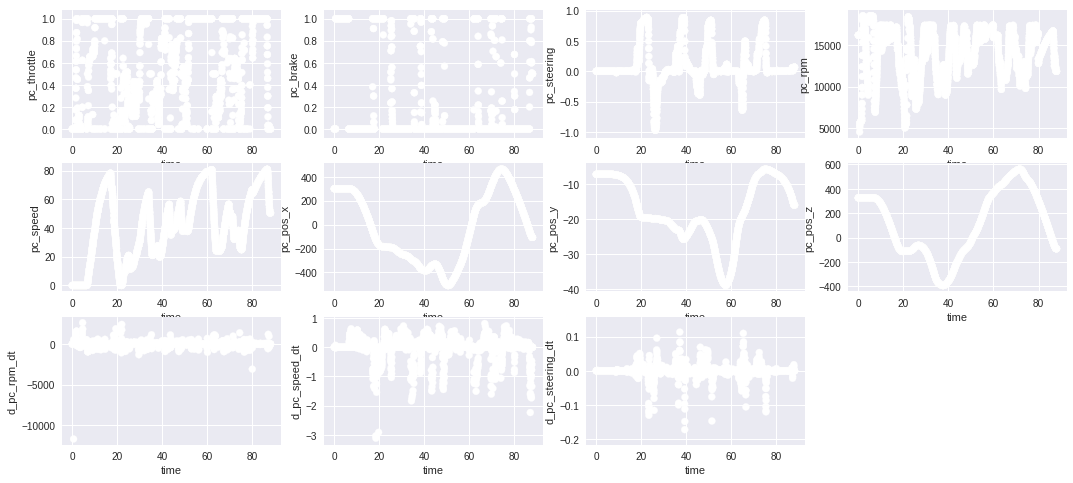

In [157]:
### Scatter plot the data 


X = user_0_flt[model_cols].as_matrix()


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_
# user_0_flt['label'] = labels
user_0_flt['label'] = 0 

numplots = len(model_cols)
plotrows = 4

def plot_subplot(df, x_col,  cols2plot,nrows, color = [1] ,figsize = [18,8]):
    
    numplots = len(cols2plot)
    ncols = int((numplots+nrows-1)/nrows)
    plt.figure(figsize=figsize)
    
    for n in range(0,numplots):
        i = int(n/ncols)
        j = n-i*ncols
        y_col = cols2plot[n]

        plt.subplot(nrows,ncols,n+1)
        plt.scatter(df[x_col],df[y_col], c = color)
        
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        
    plt.show()

plot_subplot(user_0_flt,'time',model_cols,3,color = user_0_flt['label'].values*3)




/home/kenny/programs/anaconda2/envs/scicomp/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


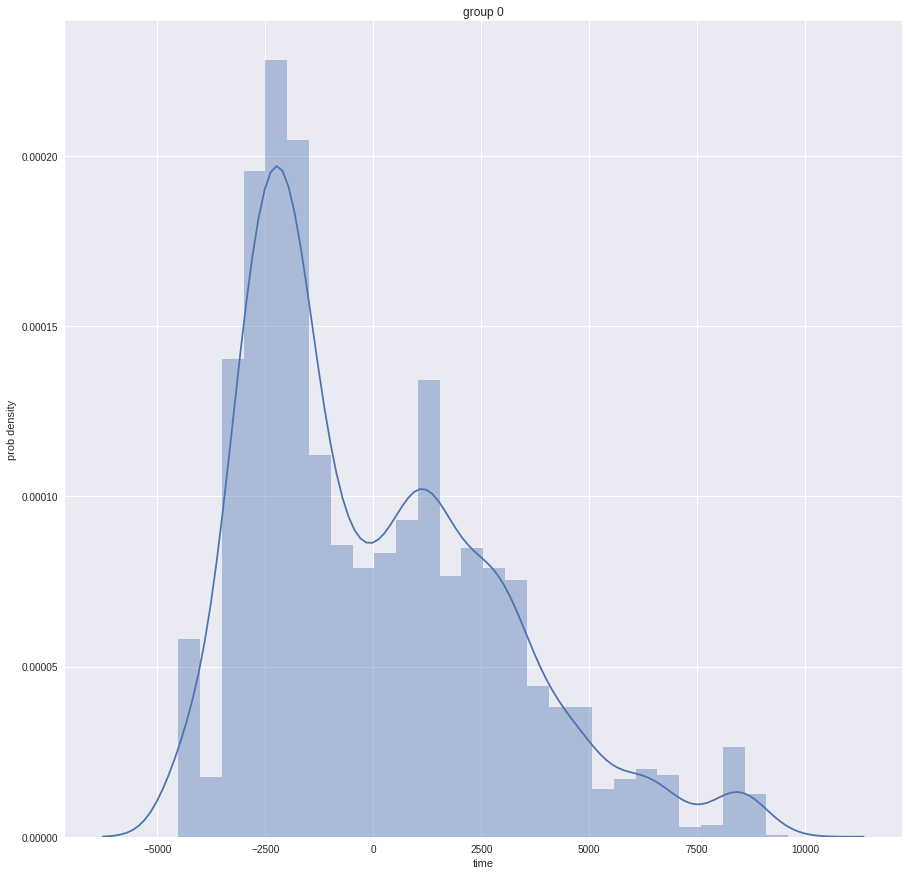

In [158]:
# for each label  -> perform a PCA and find the outliers
import seaborn as sns
sns.set(color_codes=True)
from sklearn.decomposition import PCA

grouped = user_0_flt.groupby('label')
num_grps = len(grouped)

plt.figure(figsize=[15,15])
idx = 1
quantiles = {}

user_0_flt['quant'] = 0 

for nm, grp in grouped:
    X = grp[model_cols].as_matrix()
    pca = PCA(n_components=2)
    pca.fit(X)
    T = pca.transform(X)
    
    T1 = T[:,0].copy()
    sorter = np.argsort(T1)
    sort_idx = np.searchsorted(T1,T1,side = 'left', sorter=sorter)
    
    quant =np.array(sort_idx,dtype=float)/len(sort_idx) 
    grp['quant'] = quant
    grp_s = grp['quant']
    user_0_flt['quant'].update(grp_s)
    
    plt.subplot(num_grps,1,idx)
    sns.distplot(T[:,0]) 
    plt.xlabel('time')
    plt.ylabel('prob density')
    plt.title('group ' + str(nm))
    
    idx +=1 
        
plt.show()
       
    
    

In [162]:
print T[0,:]
print user_0_flt.loc[0]

[-2160.82652334   361.59682423]
pc_throttle                       0
pc_brake                          0
pc_steering                       0
pc_rpm                      16220.1
pc_speed                          0
pc_pos_x                    300.573
pc_pos_y                   -7.28484
pc_pos_z                    325.803
time                              0
dt                  0 days 00:00:00
id                                0
d_pc_rpm_dt                       0
d_pc_speed_dt                     0
d_pc_steering_dt                  0
label                             0
quant                      0.269912
outlier                           0
Name: 0, dtype: object


/home/kenny/programs/anaconda2/envs/scicomp/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


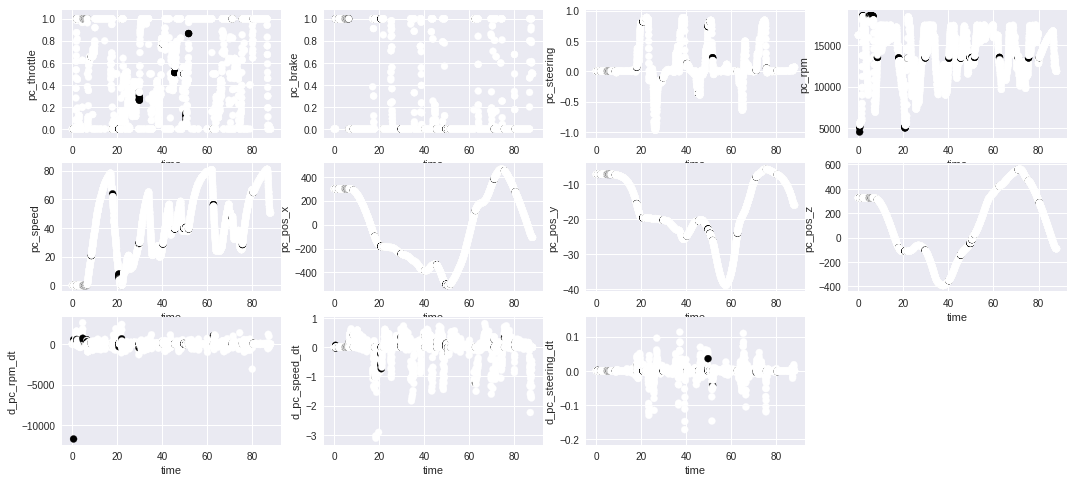

In [139]:
lquant = .01 
rquant = .99
def classify(x):
    return x < lquant or x > rquant

user_0_flt['outlier'] = user_0_flt['quant'].apply(classify)+0.
user_0_flt['outlier']

plot_subplot(user_0_flt,'time',model_cols,3,color = user_0_flt['outlier'].values)



In [149]:
### now do the normal variance  
def unnormalized_covariance(A,mu):
    """
    :param A: the design matrix A in R^{MxN} where each row is a separate sample point and the columns represent
    the dimension
    :param mu: a R^Nx1 vector with means 
    :return: 
    """
    # A is the design matrix     
    (M,N) = A.shape
    mean = np.matlib.repmat(mu,M,1)
    A = A-mean # desing matrix with subtracted out mean! 
    return np.matmul(A.T,A), N

def MVN_prob(x,mu, Pr,dPr):
    """
    calculate the p-value of X for a multivariate normal distribution 
    :param x: the feature vector  
    :param mu: the means 
    :param Pr: the precision matrix  (the iverse of the covariance matix!)
    :param dPr: the determinant of the precision matrix 
    :return: 
    """
    assert Pr.shape[0] == Pr.shape[1]
    assert x.shape == mu.shape 
    assert max(x.shape) == Pr.shape[0]
    
    N = max(x.shape) # dimensions of the feature vector! 
    n = min(x.shape)
    
    x.shape = (N,n)
    mu.shape = (N,n)
    
    # check for bad data ! 
    assert n == 1 , " invalid data format - x must be a rank 1 tensor " 
    
    x = x.reshape([N,1])
    N = len(x)
    return np.sqrt(dPr/(2*np.pi)**N)\
           *np.exp(-0.5*np.matmul(np.matmul((x-mu).T,Pr),x))
